In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [9]:
df1 = pd.read_csv('data/df_kg_v1.csv')
df_all1 = df1.copy()

In [10]:
y = df_all1.pop('actualkwh')
X = df_all1

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, test_size=.25, random_state=42)

In [12]:
params = {
    'alpha': np.linspace(0.01,.5,5),
    'l1_ratio': np.linspace(0,1,3)
}
en = ElasticNet()
gs_en = GridSearchCV(en, params, cv=3, verbose=1, n_jobs = 4)

In [13]:
gs_en.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    4.5s finished
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'alpha': array([0.01  , 0.1325, 0.255 , 0.3775, 0.5   ]), 'l1_ratio': array([0. , 0.5, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [14]:
gs_en.best_score_

0.9581779002326206

In [15]:
gs_en.best_params_

{'alpha': 0.5, 'l1_ratio': 1.0}

In [16]:
gs_en.score(X_test, y_test)

0.9468594300444293

In [28]:
df0 = pd.read_csv('data/df_kgnasa.csv')

In [29]:
df = df0.copy()

In [30]:
y = df.pop('actualkwh')
X = df

In [31]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=.75, test_size=.25, random_state=42)

In [36]:
params = {
    'alpha': np.linspace(1,10,20),
    'l1_ratio': np.linspace(0,1,4)
}
en = ElasticNet()
gs_en = GridSearchCV(en, params, cv=3, verbose=1, n_jobs = 4)

gs_en.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/matchdt/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   22.1s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'alpha': array([ 1.     ,  1.47368,  1.94737,  2.42105,  2.89474,  3.36842,
        3.84211,  4.31579,  4.78947,  5.26316,  5.73684,  6.21053,
        6.68421,  7.15789,  7.63158,  8.10526,  8.57895,  9.05263,
        9.52632, 10.     ]), 'l1_ratio': array([0.     , 0.33333, 0.66667, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [37]:
gs_en.best_score_

0.9583892515419525

In [25]:
# gs_en.best_score_ current

0.9583894124715684

In [9]:
# gs_en.best_score_

0.9583890191437258

In [38]:
gs_en.best_params_

{'alpha': 5.263157894736842, 'l1_ratio': 1.0}

In [26]:
# gs_en.best_params_ current

{'alpha': 2.4210526315789473, 'l1_ratio': 1.0}

In [10]:
# gs_en.best_params_

{'alpha': 0.5, 'l1_ratio': 1.0}

In [39]:
gs_en.score(X_test, y_test)

0.9473701090759119

In [11]:
# gs_en.score(X_test, y_test)

0.9473724210714085

In [39]:
X.columns

Index(['capacity_dc_kw', 'opt_norm_tilt', 'opt_norm_az',
       'mount_type_Fixed - Roof Mounted', 'koeppen_Moderate',
       'paneltype_other', 'paneltype_poly', 'cellcategory_Premium',
       'cellcategory_Standard', 'cellcategory_Thin Film', 'ALLSKY_SFC_SW_DWN',
       'KT', 'PRECTOT', 'PS', 'T2M', 'WS2M'],
      dtype='object')

In [40]:
en = ElasticNet(alpha= 5.263157894736842, l1_ratio=1.0)

In [41]:
en.fit(X_train, y_train)

ElasticNet(alpha=5.263157894736842, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

Text(0.5,1,'Elastic Net Coefficients')

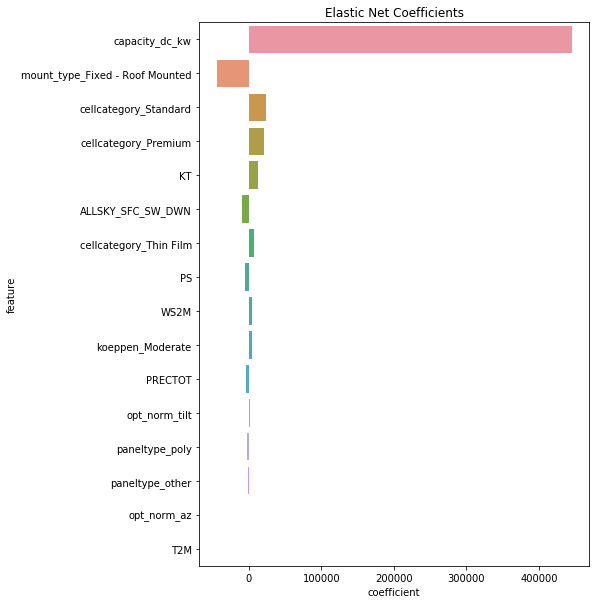

In [42]:
coefs = pd.DataFrame({
    'feature': X.columns,
    'coefficient': en.coef_,
    'abs_coef': np.abs(en.coef_)
})
coefs.sort_values('abs_coef', inplace=True, ascending=False)

plt.figure(figsize=(7,10))
sns.barplot(x=coefs.coefficient.head(16), y=coefs.feature.head(16), orient='h')
plt.title("Elastic Net Coefficients")

In [43]:
coefs

,feature,coefficient,abs_coef
0,capacity_dc_kw,445001.567634,445001.567634
3,mount_type_Fixed - Roof Mounted,-44340.620341,44340.620341
8,cellcategory_Standard,23428.503976,23428.503976
7,cellcategory_Premium,21646.700163,21646.700163
11,KT,13318.147843,13318.147843
10,ALLSKY_SFC_SW_DWN,-9239.989018,9239.989018
9,cellcategory_Thin Film,6657.402966,6657.402966
13,PS,-5082.589470,5082.589470
15,WS2M,4145.317924,4145.317924
4,koeppen_Moderate,3793.679631,3793.679631


In [44]:
pickle.dump(en, open('final2_en_model.pkl', 'wb'))

In [45]:
en_ = pickle.load(open('final2_en_model.pkl','rb'))

In [46]:
y_pred = en_.predict(X_test)
lr_mse = mean_squared_error(y_test,y_pred)
lr_mse**.5

108975.90975542899

# Random Forest

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, test_size=.25, random_state=42)

In [49]:
rf = RandomForestRegressor(n_jobs=4)

# Creating gridsearch to find optimal parameters.
params = {
    'max_depth': np.linspace(60,100,5),
    'n_estimators': np.linspace(100,400,4, dtype=int)
}

gs_rf = GridSearchCV(rf, params, cv=3, verbose=1,n_jobs=4)

In [50]:
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  2.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': array([ 60.,  70.,  80.,  90., 100.]), 'n_estimators': array([100, 200, 300, 400])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [51]:
gs_rf.best_score_

0.9615455687612194

In [52]:
gs_rf.best_params_

{'max_depth': 70.0, 'n_estimators': 300}

In [53]:
gs_rf.score(X_test, y_test)

0.9627847383556281

In [50]:
# gs_rf.best_score_

0.9644029380816832

In [51]:
# gs_rf.best_params_

{'max_depth': 88.88888888888889, 'n_estimators': 200}

In [52]:
# gs_rf.score(X_test, y_test)

0.9640111814137597

In [55]:
rf = RandomForestRegressor(max_depth=70, n_estimators=300,n_jobs=4)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9632361225823755

In [53]:
# rf = RandomForestRegressor(max_depth= 88.88888888888889, n_estimators=200,n_jobs=4)

In [54]:
# rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse',
           max_depth=88.88888888888889, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=4, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [59]:
# rf.score(X_test, y_test)

0.9636283269678891

In [62]:
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred)

8207139491.904385

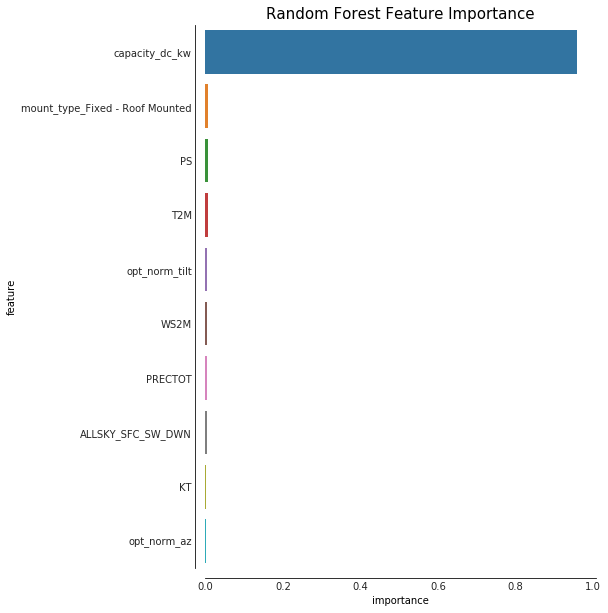

In [55]:
feature_imports = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})

feature_imports.sort_values("importance", inplace=True, ascending=False)
plt.figure(figsize=(7,10))
sns.barplot(x=feature_imports.importance.head(10), y=feature_imports.feature.head(10), orient='h')
plt.title("Random Forest Feature Importance", size=15)
sns.set_style("white")
sns.despine(offset=10, trim=False);

In [56]:
pickle.dump(rf, open('final_rf_model.pkl', 'wb'))

In [26]:
rf_ = pickle.load(open('final_rf_model.pkl', 'rb'))

In [27]:
y_pred = rf_.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_mse**.5

90593.26405370537

In [64]:
rf_resids = y_pred-y_test

In [65]:
rf_res = np.array(rf_resids)

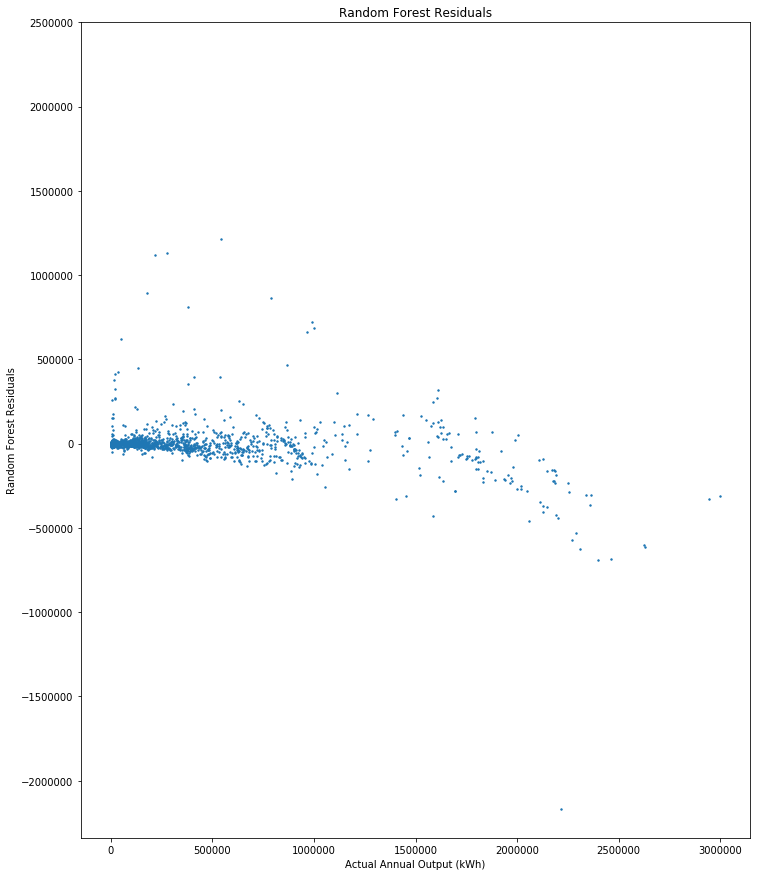

In [72]:
plt.figure(figsize=(12,15))
plt.scatter(np.array(y_test), rf_res, s=2)
plt.title("Random Forest Residuals")
plt.yticks(np.linspace(-2000000,2500000,10))
plt.xlabel("Actual Annual Output (kWh)")
plt.ylabel("Random Forest Residuals");

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(np.array(y_test), rf_res, s=2)
plt.title("Random Forest Residuals")
plt.yticks(np.linspace(-2000000,2500000,10))
plt.xlabel("Actual Annual Output (kWh)")
plt.ylabel("Random Forest Residuals");